In [ ]:
#%pip install scikit-image

In [1]:
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray # RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [4]:
cat = rgb2gray(imread('cat.jpg'))

In [5]:
cat.shape

(3266, 4899)

In [6]:
cat

array([[0.81598392, 0.80814078, 0.88293333, ..., 0.08613451, 0.10938118,
        0.10938118],
       [0.76500353, 0.77284667, 0.84371765, ..., 0.06652667, 0.08977333,
        0.0936949 ],
       [0.78853294, 0.81206235, 0.84735647, ..., 0.04858549, 0.07829137,
        0.09005608],
       ...,
       [0.70269882, 0.67132627, 0.69821176, ..., 0.87088588, 0.86724706,
        0.87901176],
       [0.6483702 , 0.6601349 , 0.67860392, ..., 0.89441529, 0.88265059,
        0.87480745],
       [0.64444863, 0.6601349 , 0.67468235, ..., 0.88265059, 0.87088588,
        0.86304275]])

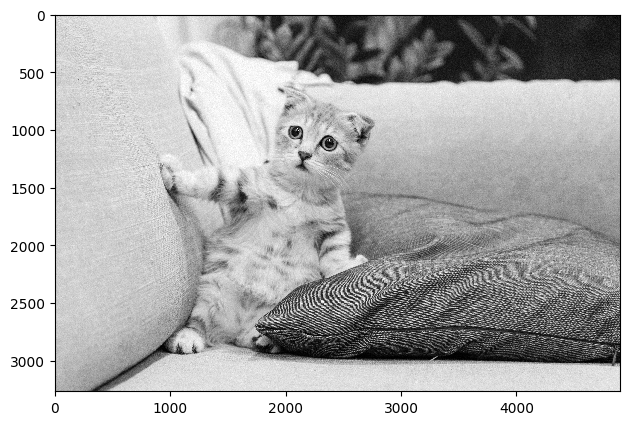

In [7]:
imshow(cat)

In [8]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

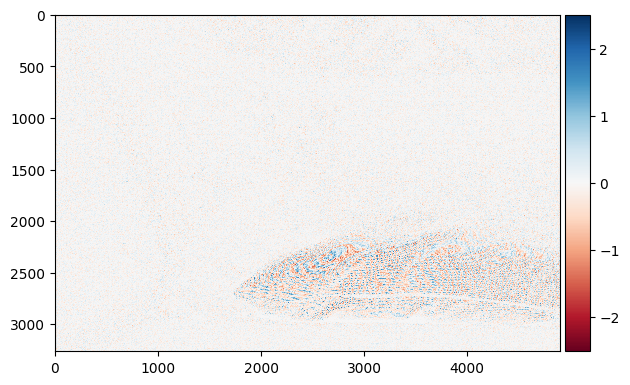

In [10]:
# Edge Detection
edge_im = convolve2d(cat, edge, 'valid')
imshow(edge_im)

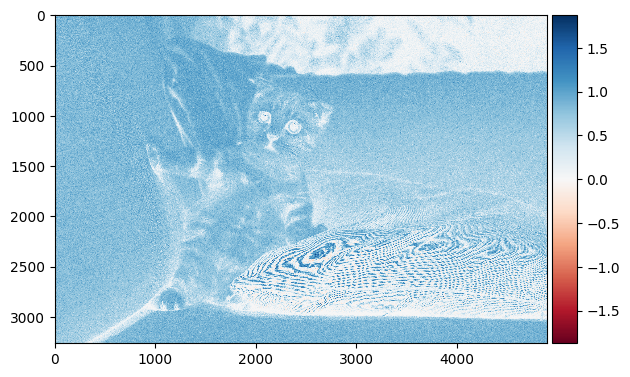

In [11]:
# Sharpen
sharp_im = convolve2d(cat, sharpen, 'valid')
imshow(sharp_im)

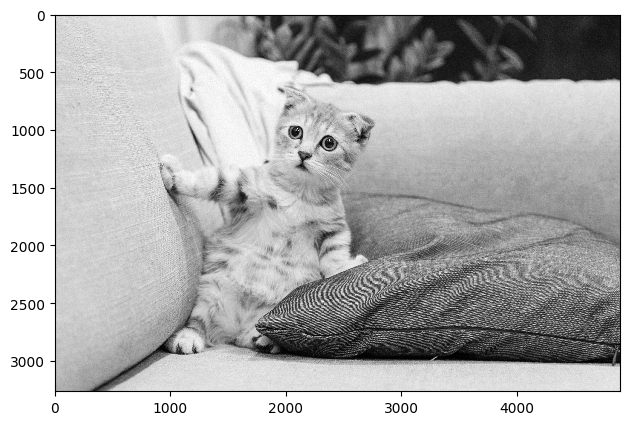

In [12]:
# Guaussian Blur
blur_im = convolve2d(cat, blur, 'valid')
imshow(blur_im)

# CNN 구조 구현해 보기

In [13]:
import tensorflow as tf

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
input_layer = tf.keras.layers.Input(shape = (28, 28, 1))

x = tf.keras.layers.Conv2D(
    filters = 4,
    kernel_size = 3,
    strides = 1,
    padding = 'same',
    activation = 'relu',
)(input_layer)

print(type(x))
print(x)

2024-03-12 16:46:08.784330: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-12 16:46:08.784358: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-12 16:46:08.784382: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-12 16:46:08.784434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 16:46:08.784456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<class 'keras.src.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [18]:
print(input_layer.shape)
print(x.shape)

(None, 28, 28, 1)
(None, 28, 28, 4)


# Pooling layer

In [22]:
input_layer = tf.keras.layers.Input(shape = (27, 27, 1))

x1 = tf.keras.layers.Conv2D(
    filters = 6,
    kernel_size = 2,
    strides = 2,
    padding = 'same',  # Updated padding value
    activation = 'relu',
)(input_layer)

x2 = tf.keras.layers.MaxPooling2D(2)(x1) 

print(x1)
print(x2)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 6), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 6), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


In [23]:
input_layer = tf.keras.layers.Input(shape=(7, 7, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 7, 7, 5)]         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           184       
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 8)           296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 8)           0         
 g2D)                                                            
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
input_layer = tf.keras.layers.Input(shape=(13, 13, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='valid')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 13, 13, 5)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 8)         368       
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 16)          3216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                            
                                                                 
Total params: 3584 (14.00 KB)
Trainable params: 3584 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor) 
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 합니다.
x = tf.keras.layers.Flatten()(x) 

# Flatten 된 결과를 100의 노드를 가진 Fuly Connected Layer와 연결 
x = tf.keras.layers.Dense(100, activation='relu')(x) 
output = tf.keras.layers.Dense(10, activation='softmax')(x)

In [29]:
model = tf.keras.Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           